<a href="https://colab.research.google.com/github/CollinsKarani/Passphrase-and-Password-Guessing-Using-Recurrent-Neural-Networks/blob/main/Levenshtein_and_Jaro_Winkler_distances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Streaming output truncated to the last 5000 lines.
Processed a batch of 2 passwords, total Levenshtein distances: 49818, total Jaro-Winkler distances: 49818
Processed a batch of 5 passwords, total Levenshtein distances: 49828, total Jaro-Winkler distances: 49828
Processed a batch of 2 passwords, total Levenshtein distances: 49829, total Jaro-Winkler distances: 49829
Processed a batch of 5 passwords, total Levenshtein distances: 49839, total Jaro-Winkler distances: 49839
Processed a batch of 10 passwords, total Levenshtein distances: 49884, total Jaro-Winkler distances: 49884
Processed a batch of 1 passwords, total Levenshtein distances: 49884, total Jaro-Winkler distances: 49884
Processed a batch of 3 passwords, total Levenshtein distances: 49887, total Jaro-Winkler distances: 49887
Processed a batch of 7 passwords, total Levenshtein distances: 49908, total Jaro-Winkler distances: 49908
Processed a batch of 6 passwords, total Levenshtein distances: 49923, total Jaro-Winkler distances: 

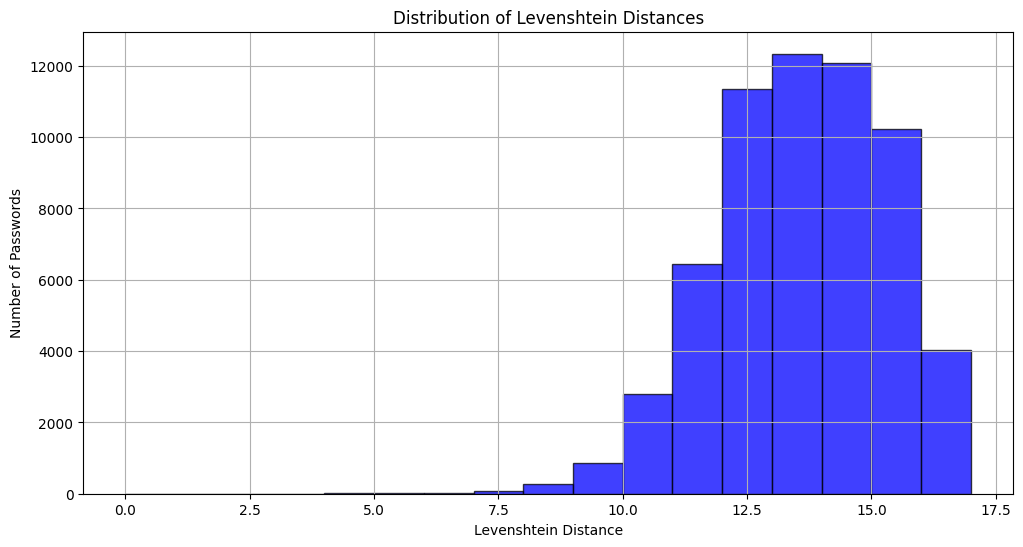

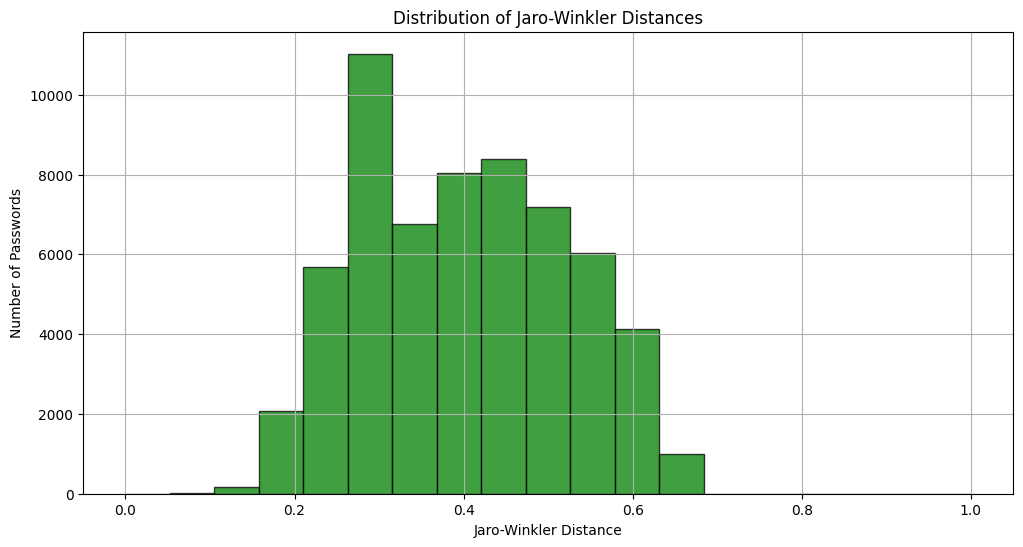

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk.metrics.distance import edit_distance, jaro_winkler_similarity # import the function from the correct module
import nltk
nltk.download('punkt')

# Filter passwords based on length and ASCII characters
def filter_passwords(password_list):
    filtered = [pwd for pwd in password_list if 5 <= len(pwd) <= 17 and pwd.isascii()]
    return list(set(filtered))  # Remove duplicates

# Load passwords in batches
def load_passwords(filename, batch_size=100000):
    with open(filename, 'r', encoding='latin-1') as f:
        batch = []
        for line in f:
            batch.append(line.strip())
            if len(batch) == batch_size:
                yield filter_passwords(batch)
                batch = []
        if batch:
            yield filter_passwords(batch)

# Compute Levenshtein distances for a batch of passwords
def compute_levenshtein_distances(password_batch):
    num_passwords = len(password_batch)
    distances = []

    for i in range(num_passwords):
        for j in range(i + 1, num_passwords):  # Only upper triangle to save space
            dist = edit_distance(password_batch[i], password_batch[j])
            distances.append(dist)
    return distances

# Compute Jaro-Winkler similarities for a batch of passwords
def compute_jaro_winkler_distances(password_batch):
    num_passwords = len(password_batch)
    distances = []

    for i in range(num_passwords):
        for j in range(i + 1, num_passwords):  # Only upper triangle to save space
            similarity = jaro_winkler_similarity(password_batch[i], password_batch[j])
            dist = 1 - similarity  # Convert similarity to distance (0 = identical, 1 = completely different)
            distances.append(dist)
    return distances

# Load and process the dataset in chunks
password_file = 'version_1.txt'  # Path to the password dataset

# Initialize empty lists to store distances
all_levenshtein_distances = []
all_jaro_winkler_distances = []

# Process the dataset in batches
for batch in load_passwords(password_file, batch_size=5000):
    # Compute Levenshtein distances
    batch_levenshtein_distances = compute_levenshtein_distances(batch)
    all_levenshtein_distances.extend(batch_levenshtein_distances)

    # Compute Jaro-Winkler distances
    batch_jaro_winkler_distances = compute_jaro_winkler_distances(batch)
    all_jaro_winkler_distances.extend(batch_jaro_winkler_distances)

    print(f"Processed a batch of {len(batch)} passwords, total Levenshtein distances: {len(all_levenshtein_distances)}, total Jaro-Winkler distances: {len(all_jaro_winkler_distances)}")

# Plot the distribution of Levenshtein distances as a histogram
plt.figure(figsize=(12, 6))
plt.hist(all_levenshtein_distances, bins=range(18), alpha=0.75, color='blue', edgecolor='black')
plt.title('Distribution of Levenshtein Distances')
plt.xlabel('Levenshtein Distance')
plt.ylabel('Number of Passwords')
plt.grid(True)
plt.show()

# Plot the distribution of Jaro-Winkler distances as a histogram
plt.figure(figsize=(12, 6))
plt.hist(all_jaro_winkler_distances, bins=np.linspace(0, 1, 20), alpha=0.75, color='green', edgecolor='black') # Completed the line
plt.title('Distribution of Jaro-Winkler Distances')
plt.xlabel('Jaro-Winkler Distance')
plt.ylabel('Number of Passwords')
plt.grid(True)
plt.show()